C:\Users\HP\AppData\Local\Temp\ipykernel_15112\175828257.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_15112\175828257.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_15112\175828257.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_15112\175828257.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_15112\175828257.py:40: FutureWa

daily_weather_df : 
          date  temperature   humidity  wind_speed
0  2024-11-11    22.968571  44.571429    2.597143
1  2024-11-12    23.286250  43.125000    2.233750
2  2024-11-13    23.463750  42.000000    2.356250
3  2024-11-14    24.202500  45.875000    2.822500
4  2024-11-15    25.081250  48.500000    2.478750
5  2024-11-16    20.920000  52.000000    1.950000


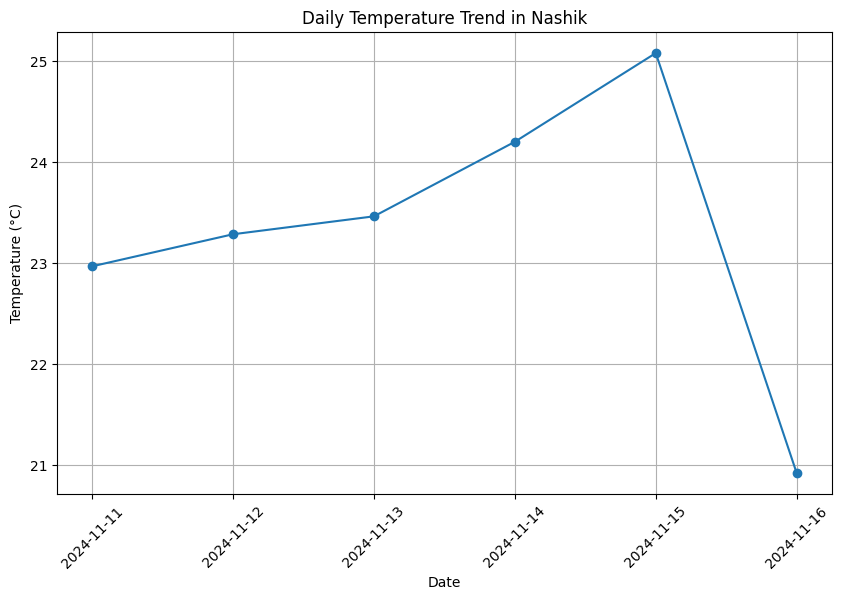

Geographical map saved as 'weather_map.html'


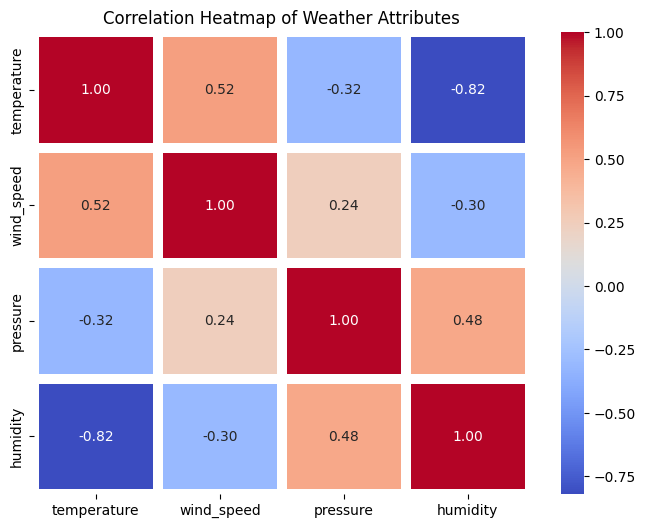

In [32]:
# Import necessary libraries
import requests  # For making HTTP requests
import pandas as pd  # For working with structured data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualizations (e.g., heatmap)
import folium  # For geographical map visualizations
from datetime import datetime  # For handling time and dates

# Step 1: Register and obtain your API key from OpenWeatherMap
api_key = '55dde7f2262dcf16d636e7dfa533a821'  # Replace with your API key
city = 'Nashik'  # City for which we are retrieving the weather data

# Step 2: Construct URL for the OpenWeatherMap 5-day forecast API
url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric'  # For 5-day forecast

# Step 3: Get the forecast data (response)
response = requests.get(url)  # Sending the GET request
forecast_data = response.json()  # Parse the response as JSON

# Check if the API response is successful
if response.status_code == 200:
    # Extract relevant weather data from the API response
    list_of_forecasts = forecast_data['list']  # List of weather data for multiple time intervals (3-hour forecast)
    city_name = forecast_data['city']['name']  # City name from the response
    
    # Step 4: Extract the weather details from each forecast entry
    weather_df = pd.DataFrame(columns=['datetime', 'temperature', 'humidity', 'pressure', 'wind_speed', 'weather_description'])
    
    for forecast in list_of_forecasts:
        # Extracting weather details for each forecast entry (every 3 hours)
        date_time = forecast['dt_txt']
        temp = forecast['main']['temp']
        humidity = forecast['main']['humidity']
        pressure = forecast['main']['pressure']
        wind_speed = forecast['wind']['speed']
        weather_description = forecast['weather'][0]['description']
        
        # Adding data to the dataframe
        weather_df = weather_df.append({
            'datetime': date_time,
            'temperature': temp,
            'humidity': humidity,
            'pressure': pressure,
            'wind_speed': wind_speed,
            'weather_description': weather_description
        }, ignore_index=True)

    
    # Step 5: Convert datetime column to proper datetime type
    weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
    

    # Step 6: Aggregate data by day (e.g., daily average temperature, humidity, wind speed)
    weather_df['date'] = weather_df['datetime'].dt.date  # Extract the date part from the datetime
    # dt give date and time both
    # .date means give only date and .time means only time

    daily_weather_df = weather_df.groupby('date').agg({
        'temperature': 'mean',  # Daily average temperature
        'humidity': 'mean',  # Daily average humidity
        'wind_speed': 'mean',  # Daily average wind speed
    }).reset_index()
    
    # Display aggregated daily data
    print("daily_weather_df : \n",daily_weather_df)
    
    # Plot daily temperature trends
    plt.figure(figsize=(10, 6))
    plt.plot(daily_weather_df['date'], daily_weather_df['temperature'], marker='o', color='tab:blue')
    plt.title(f'Daily Temperature Trend in {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Task 8: Geographical Information and Map Visualizations
    # Extract latitude and longitude of the city
    lat = forecast_data['city']['coord']['lat']
    lon = forecast_data['city']['coord']['lon']
    
    # Create a map centered at the city's location
    map_ = folium.Map(location=[lat, lon], zoom_start=10)  # Zoom to level 10 for city-level view
    
    # Add a marker for the city location with a popup that shows city weather description
    folium.Marker([lat, lon], popup=f'{city_name}: {weather_description}').add_to(map_)
    
    # Show the map
    map_.save("weather_map.html")
    print("Geographical map saved as 'weather_map.html'")

    # Step 9: Use Seaborn to visualize correlations (Heatmap of weather attributes)
    # Example: Let's create a correlation matrix to see relationships between attributes
    # Convert 'humidity' and 'pressure' columns to numeric data type
    weather_df['humidity'] = pd.to_numeric(weather_df['humidity']) # because their data types is Object
    weather_df['pressure'] = pd.to_numeric(weather_df['pressure'])
    
    correlation_matrix = weather_df[['temperature', 'wind_speed', 'pressure', 'humidity']].corr()

    # Heatmap to visualize correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=6)
    plt.title('Correlation Heatmap of Weather Attributes')
    plt.show()

else:
    print(f"Error fetching data: {response.status_code}")



In [14]:
forecast_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1731272400,
   'main': {'temp': 20.15,
    'feels_like': 19.6,
    'temp_min': 19.34,
    'temp_max': 20.15,
    'pressure': 1015,
    'sea_level': 1015,
    'grnd_level': 941,
    'humidity': 53,
    'temp_kf': 0.81},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 0.7, 'deg': 141, 'gust': 0.84},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-11-10 21:00:00'},
  {'dt': 1731283200,
   'main': {'temp': 19.16,
    'feels_like': 18.62,
    'temp_min': 18.46,
    'temp_max': 19.16,
    'pressure': 1014,
    'sea_level': 1014,
    'grnd_level': 941,
    'humidity': 57,
    'temp_kf': 0.7},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 1},
   'wind': {'speed': 1.01, 'deg': 79, 'gust': 1.04},
   'visibility': 10000,
   'pop'